# TOC (not functional)

0. [Imports](#0.0-bullet)
1. [Part 1](#1.0-bullet)  
 1.1 [Summary Statistics](#1.1-bullet)  
 1.2 [Duration](#1.2-bullet)  
 1.3 [Text Analysis](#1.3-bullet)  
 1.4 [Time Series](#1.4-bullet)  

2. [Part 2](#2.0-bullet)  
 2.1 [Feature Down-Select](#2.1-bullet)  
 2.2 [Feature Behavior](#2.2-bullet)  
 2.3 [Additional Ratio Exploration](#2.2-bullet)  

# <a class="anchor" id="0.0-bullet">Imports</a>

In [1]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
"""from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
#plt.style.use('classic')
#sns.set_style(None)

In [2]:
df_main = pd.read_csv('./data/clean_data_nocomments_noviews_02.10.18.csv')

#create log features
df_main['view_log'] = df_main['viewCount'].map(lambda x: 0 if x==0 else np.log10(x)) #Which log to use???
df_main['comment_log'] = df_main['commentCount'].map(lambda x: 0 if x==0 else np.log10(x))
df_main['like_log'] = df_main['likeCount'].map(lambda x: 0 if x==0 else np.log10(x))
df_main['dislike_log'] = df_main['dislikeCount'].map(lambda x: 0 if x==0 else np.log10(x))

df_main.publishedAt = pd.to_datetime(df_main.publishedAt)
df_main['week'] = df_main.publishedAt.map(lambda x: x.week)

df_main.description.fillna('', inplace=True)

df_main.tags.fillna('', inplace=True)

Run_Text_Analysis = False

# <a class="anchor" id="1.0-bullet">1.0 Part 1</a>

# <a class="anchor" id="1.1-bullet">1.1 Summary Statistics</a>

In [3]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'week'],
      dtype='object')

In [4]:
df_main.shape

(8694, 30)

In [5]:
print('   mean: ', df_main.viewCount.mean())
print('   median: ', df_main.viewCount.median())
print('   mode: ', df_main.viewCount.mode())

   mean:  53227002.69358178
   median:  3362238.5
   mode:  0    0
dtype: int64


In [6]:
#How skewed are we?
df_main.viewCount.mean() /  df_main.viewCount.median()

15.830823034588946

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


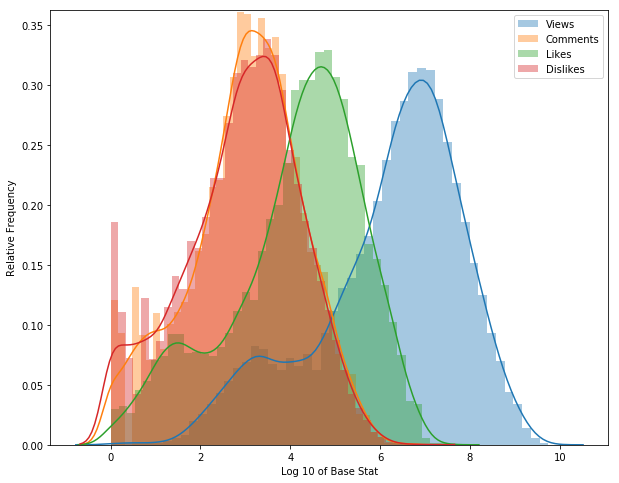

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
sns.distplot(np.log10(df_main[df_main.viewCount>0].viewCount), ax=ax, label='Views') #Views
sns.distplot(np.log10(df_main[df_main.commentCount>0].commentCount), ax=ax, label='Comments') #Comments
sns.distplot(np.log10(df_main[df_main.likeCount>0].likeCount), ax=ax, label='Likes',) #Likes
sns.distplot(np.log10(df_main[df_main.dislikeCount>0].dislikeCount), ax=ax, label='Dislikes') #dislikes -- very similar to comments 
ax.axes.set_xlabel('Log 10 of Base Stat')
ax.axes.set_ylabel('Relative Frequency')
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

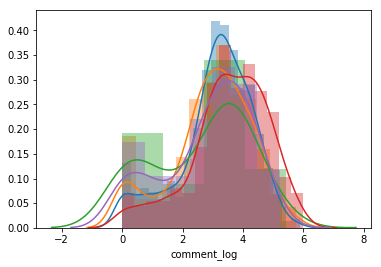

In [10]:
sns.distplot(df_main[df_main.tags.str.contains('rap')]['comment_log'])
sns.distplot(df_main[df_main.tags.str.contains('rock')]['comment_log'])
sns.distplot(df_main[df_main.tags.str.contains('edm')]['comment_log'])
sns.distplot(df_main[df_main.tags.str.contains('pop')]['comment_log'])
sns.distplot(df_main[df_main.tags.str.contains('trap')]['comment_log'])

In [3]:
df_main['view_class'] = df_main.view_log.astype(int)

In [7]:
(df_main.view_class.value_counts()/df_main.shape[0]).sort_index()

0    0.002415
1    0.008167
2    0.047619
3    0.071544
4    0.079135
5    0.155970
6    0.280423
7    0.251208
8    0.093743
9    0.009777
Name: view_class, dtype: float64

In [8]:
#Engagement
print('   comment ratio', (df_main.commentCount / df_main.viewCount).median())
print('   dislike ratio', (df_main.dislikeCount / df_main.viewCount).median())
print('   like ratio', (df_main.likeCount / df_main.viewCount).median())

   comment ratio 0.00034203926675335035
   dislike ratio 0.00022929015398251337
   like ratio 0.006713840631370753


In [34]:
def get_col_mode(df,col_name):
    df=df
    col_name = col_name
    series_vals = df[col_name]
    _temp_dict = {}
    _temp_step = round(max(series_vals) / 200, 3)
    #Start at 2 to avoid 0s
    for i in range(9, 200):
        _min = i*_temp_step
        _max = (i+1)*_temp_step
        _temp_dict[_max] = df[(df[col_name] >=_min)& (df[col_name]<_max)].shape[0]
    return [k for k in _temp_dict.keys() if _temp_dict[k]==max(_temp_dict.values())][0], _temp_dict

In [35]:
comment_mode = get_col_mode(df_main,'comment_log')[0]
dislike_mode = get_col_mode(df_main,'dislike_log')[0]
view_mode = get_col_mode(df_main,'view_log')[0]
like_mode = get_col_mode(df_main,'like_log')[0]

In [36]:
comment_mode

3.128

In [37]:
dislike_mode

2.9400000000000004

In [38]:
view_mode

6.958

In [39]:
like_mode

4.403

In [40]:
(df_main[(df_main.view_log >= 7)&(df_main.view_log<10)]['likeCount'] / df_main[(df_main.view_log >= 7)&(df_main.view_log<10)]['viewCount']).median()

0.005501803737486802

In [41]:
view_bins = get_col_mode(df_main,'like_log')[1]
view_bins

{0.37: 0,
 0.407: 0,
 0.44399999999999995: 0,
 0.481: 42,
 0.518: 0,
 0.5549999999999999: 0,
 0.592: 0,
 0.629: 40,
 0.6659999999999999: 0,
 0.703: 32,
 0.74: 0,
 0.7769999999999999: 0,
 0.814: 31,
 0.851: 33,
 0.8879999999999999: 0,
 0.9249999999999999: 19,
 0.962: 24,
 0.999: 0,
 1.036: 33,
 1.073: 34,
 1.1099999999999999: 20,
 1.147: 41,
 1.184: 21,
 1.2209999999999999: 17,
 1.258: 37,
 1.295: 21,
 1.3319999999999999: 27,
 1.369: 30,
 1.406: 22,
 1.4429999999999998: 31,
 1.48: 29,
 1.517: 20,
 1.5539999999999998: 27,
 1.591: 34,
 1.628: 40,
 1.6649999999999998: 31,
 1.702: 26,
 1.7389999999999999: 24,
 1.7759999999999998: 15,
 1.813: 29,
 1.8499999999999999: 22,
 1.887: 28,
 1.924: 20,
 1.9609999999999999: 20,
 1.998: 22,
 2.0349999999999997: 33,
 2.072: 22,
 2.109: 31,
 2.146: 15,
 2.183: 28,
 2.2199999999999998: 20,
 2.2569999999999997: 18,
 2.294: 27,
 2.331: 28,
 2.368: 23,
 2.405: 27,
 2.4419999999999997: 22,
 2.479: 23,
 2.516: 26,
 2.553: 31,
 2.59: 21,
 2.627: 21,
 2.6639999

## <a class="anchor" id="1.2-bullet">1.2 Duration</a>

In [9]:
#How many of these are over 20 minutes? A lot. 
df_main[df_main.duration>(20*60)].shape[0] / df_main.shape[0]

0.06970324361628709

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


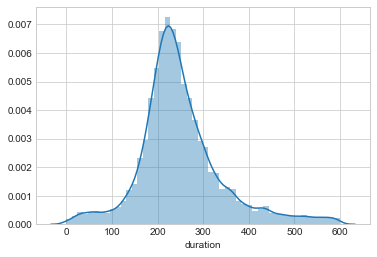

In [10]:
sns.distplot((df_main[df_main.duration<(10*60)].duration))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


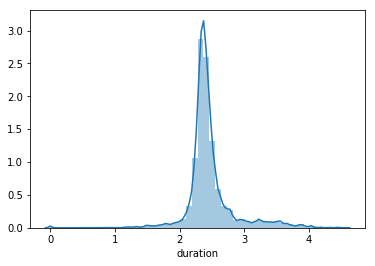

In [43]:
sns.distplot(np.log10(df_main.duration).map(lambda x: 0 if x == -np.inf else 
                              3600 if x==np.inf else x).fillna(0))

In [11]:
#Are they interesting?
df_main[df_main.duration>(20*60)]['viewCount'].max()

182653201

In [12]:
# A lot of relaxation stuff here. 
df_main[(df_main.duration>(20*60))&(df_main.viewCount>10000000)].loc[:, ['description', 'title', 'viewCount']]

,description,title,viewCount
38,The extended version of Clair de Lune. \r\r\n\...,Clair de Lune (Extended),21055960
481,Relaxdaily's instrumental background music: sl...,Background Music Instrumentals - relaxdaily - ...,76793517
562,3 hours of beautiful music (tracklist below) b...,3 Hours of Beautiful Music by Peder B. Helland,15990378
661,Subscribe for more classical music: http://bi...,The Best of Beethoven,31932211
1155,Pachelbel's Canon aka Canon in D is the name c...,Canon In D | Pachelbel's Canon | 1 Hour Version,19945987
1325,"Live At the Grand Rex, Paris April 2004, Cesar...",Cesaria Evora Live D'amor 2004 (Complete Concert),16876744
1344,Wolfgang Amadeus Mozart: Requiem in D minor (...,Mozart - Requiem in D minor (Complete/Full) [HD],34548812
1416,The clock is ticking and the world awaits... W...,I’d do it all | BTS: Burn the Stage Ep1,16584409
1547,Música relaxante para acalmar a mente e relaxa...,Música Relaxante - Acalmar a Mente e Relaxar,22912330
1706,★ QUER COLABORAR COM O NOSSO TRABALHO? Doe R$1...,"Música Anti-Depressão e Ansiedade, Equilibrio ...",23586767


## <a class="anchor" id="1.3-bullet">1.3 Text Stuff</a>

In [27]:
print('   featuring views avg: ', df_main[df_main.title.map(lambda x: True if 'feat' in str(x) or 'ft' in x else False)]['viewCount'].mean())
print('   non-featuring views avg: ', df_main[df_main.title.map(lambda x: False if 'feat' in str(x) or 'ft' in x else True)]['viewCount'].mean())

df_main[df_main.title.map(lambda x: True if 'feat' in str(x) or 'ft' in x else False)]['viewCount'].mean() / \
df_main[df_main.title.map(lambda x: False if 'feat' in str(x) or 'ft' in x else True)]['viewCount'].mean()

   featuring views avg:  129963768.92716536
   non-featuring views avg:  43072723.6504298


3.017310211955183

In [9]:
print('   avg overall title length', df_main.title.str.len().mean())
print('   avg overall title words', df_main.title.map(lambda x: str(x).count(' ')).mean())

   avg overall title length 47.165631469979296
   avg overall title words 7.824706694271912


In [10]:
print('   avg overall tags length', df_main.tags.str.len().mean())
print('   avg overall title words', df_main.tags.map(lambda x: str(x).count(',')).mean())

   avg overall tags length 182.95042558086035
   avg overall title words 14.162640901771336


In [11]:
print('   avg overall description length', df_main.description.str.len().mean())
print('   avg overall description words', df_main.description.map(lambda x: str(x).count(' ')).mean())

   avg overall description length 793.6029445594663
   avg overall description words 92.33770416379112


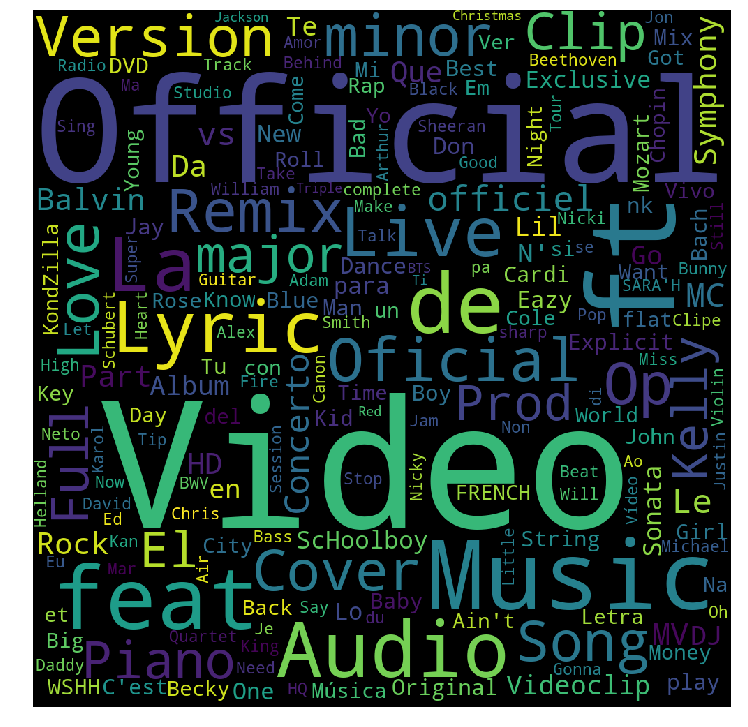

In [13]:
#Title Words
corpus_string1 = ''
for i in range(df_main.shape[0]):
    corpus_string1 = corpus_string1 + df_main.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string1)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

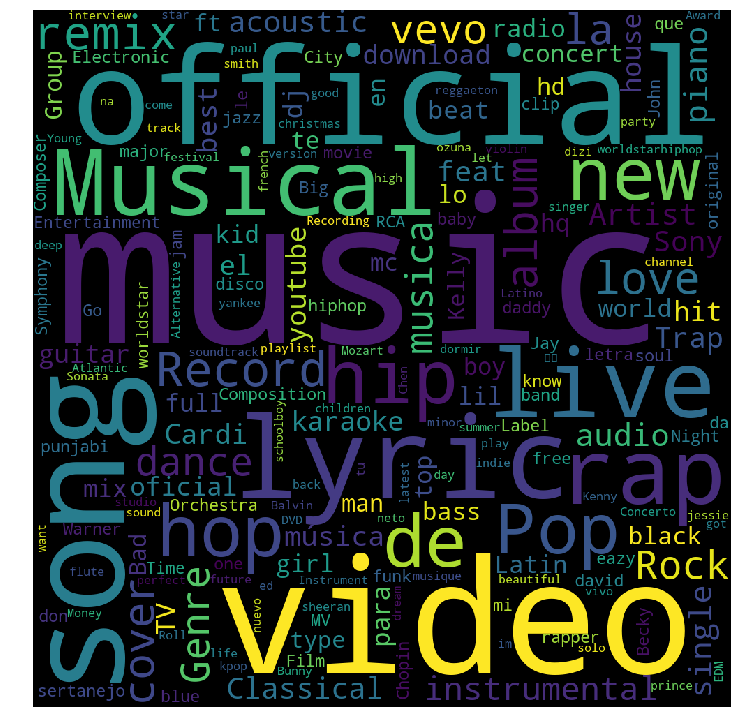

In [14]:
#Tags
corpus_string2 = ''
for i in range(df_main.shape[0]):
    corpus_string2 = corpus_string2 + str(df_main.iloc[i]['tags'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string2)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

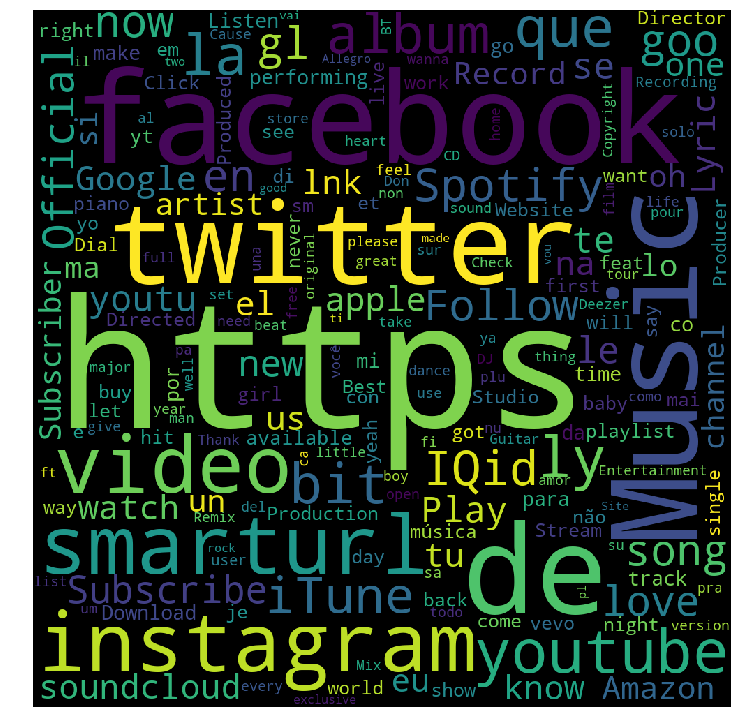

In [15]:
#Description
corpus_string3 = ''
for i in range(df_main.shape[0]):
    corpus_string3 = corpus_string3 + str(df_main.iloc[i]['description'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string3)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

 Sentiment

In [17]:
TextBlob(corpus_string1).sentiment.polarity #Title

0.1242649255397477

In [18]:
TextBlob(corpus_string2).sentiment.polarity #Tags

0.11938258688631741

In [19]:
TextBlob(corpus_string3).sentiment.polarity #Description

0.18659575052243543

## <a class="anchor" id="1.4-bullet">1.4 Time Series</a>

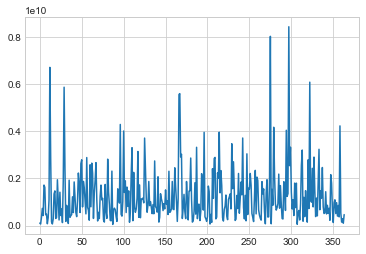

In [20]:
plt.plot([df_main[(df_main['year_day']==i)]['viewCount'].sum() for i in range(1,365)])

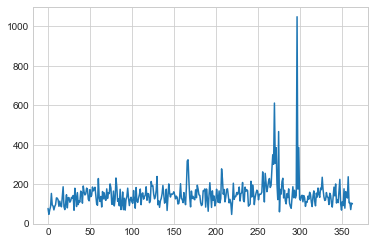

In [21]:
plt.plot([df_main[df_main['year_day']==i]['view_log'].sum() for i in range(1,365)])

In [22]:
year_day_view_list = [df_main[df_main['year_day']==i]['view_log'].sum() for i in range(1,365)]
year_day_view_list.index(max(year_day_view_list))

297

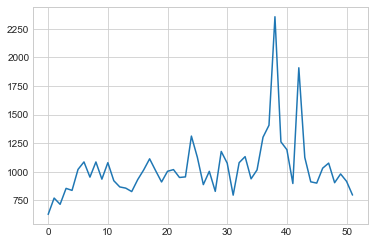

In [23]:
plt.plot([df_main[df_main['week']==i]['view_log'].sum() for i in range(1,53)])

In [6]:
plt.style.use('seaborn-whitegrid')

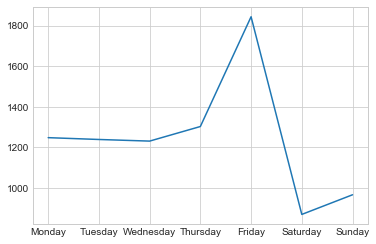

In [7]:
#Count
plt.plot(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [df_main[df_main['week_day']==i]['view_log'].count() for i in range(0,7)])

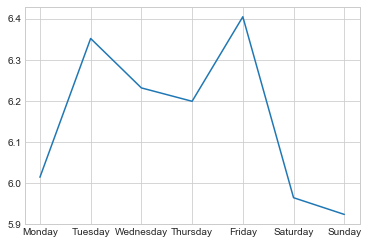

In [8]:
#Average views
plt.plot(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [df_main[df_main['week_day']==i]['view_log'].mean() for i in range(0,7)])

In [25]:
#Weekend releases:
df_main[df_main['week_day']==5]['view_log'].shape[0] + df_main[df_main['week_day']==6]['view_log'].shape[0]

1833

In [45]:
plt.style.use('seaborn-whitegrid')

No handles with labels found to put in legend.


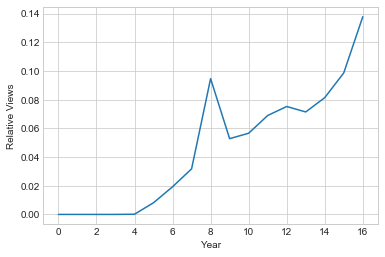

In [58]:
fig, ax = plt.subplots()
ax.plot([df_main[df_main['year']==i]['view_log'].sum() / df_main.view_log.sum() for i in range(1,18)])
ax.axes.set_xlabel('Year')
ax.axes.set_ylabel('Relative Views')
ax.legend()

No handles with labels found to put in legend.


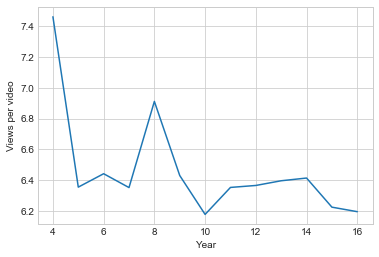

In [62]:
fig, ax = plt.subplots()
ax.plot([df_main[df_main['year']==i]['view_log'].mean() for i in range(1,18)])
ax.axes.set_xlabel('Year')
ax.axes.set_ylabel('Views per video')
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


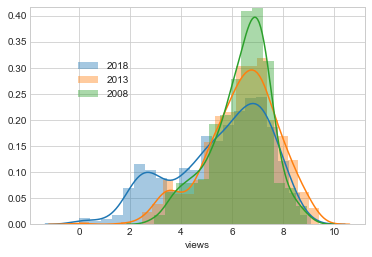

In [73]:
fig, ax = plt.subplots()
sns.distplot(df_main[df_main.year==18].view_log, ax=ax, label='2018'); #blue
sns.distplot(df_main[df_main.year==13].view_log, ax=ax, label='2013'); #orange
sns.distplot(df_main[df_main.year==8].view_log,ax=ax, label='2008'); #green
ax.axes.set_xlabel('views')
fig.legend(loc=(.2, .6))

In [80]:
df_main[(df_main.view_log<2.5)&(df_main.year==18)].loc[:,['title', 'viewCount']].head(10)

,title,viewCount
82,havana lyrics,34
582,B tone - LEAVE STORY Official Video1,240
630,Survival Knife - Divine Mob (from Divine Mob b...,48
632,WHY HOLD BACK - Trunk Boiz member B*Janky,159
751,Jonathan C. Meier - Savage (Audio),112
768,HeartLand Didgeridoo - key of C - (4701),58
995,Genomineerden gouden C 2017,157
1039,DELAIN /SING TO ME /c/ MARCO HIETALA 6/ en MAL...,26
1068,"Tram,Bix and Lang - For no reason at all in C ...",87
1370,Catalogue d'Emojis Teaser,270


## <a class="anchor" id="2.0-bullet">2.0 After Feature Engineering</a>

## <a class="anchor" id="2.1-bullet">2.1 Feature Down-select</a>

In [81]:
df_eng = pd.read_csv('./data/engineered_data/data_engineered_10.9_2019.csv')

In [16]:
df_vals_for_tableau = df_eng.loc[:,[col for col in df_eng.columns if df_eng[col].dtype!='object' or col=='publishedAt']]

In [20]:
df_vals_for_tableau.loc['publishedAt'] = pd.to_datetime(df_vals_for_tableau.publishedAt)
#df_vals_for_tableau.to_csv('./data/engineered_data/data_engineered_tableau.csv', index=False)

In [19]:
df_vals_for_tableau.view_log.head()

0    6.571227
1    7.683620
2    7.191787
3    7.349098
4    6.924367
Name: view_log, dtype: float64

In [14]:
df_eng.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'in

In [82]:
measures = ['likeCount', 'dislikeCount', 'commentCount', 'viewCount',
            'view_log',  'comment_log',  'like_log', 'dislike_log', 
            'view_class' ]
non_model_cols = ['request_token', 'letter_search','channelTitle', 'tags', 'title', 'vidId','publishedAt','favoriteCount',
              'description','defaultLanguage', ]

In [83]:
df_eng_vals = df_eng.loc[:, [col for col in df_eng.columns if col not in measures and col not in non_model_cols or\
                        col == 'view_class']]

In [84]:
df_eng_vals.dtypes.value_counts()

int64      46
float64     6
dtype: int64

In [86]:
df_eng_vals.groupby('view_class').mean().T

view_class,0,1,2,3,4,5,6,7,8,9
caption,0.000000,0.000000,0.014493,0.011254,0.023256,0.050147,0.059885,0.107143,0.206135,0.200000
definition,0.761905,0.845070,0.816425,0.728296,0.684593,0.652655,0.653404,0.693223,0.802454,0.964706
duration,701.285714,416.563380,500.164251,519.474277,753.059593,778.474189,631.095980,336.243590,256.546012,256.176471
licensedContent,0.857143,0.295775,0.270531,0.368167,0.444767,0.477139,0.551682,0.711538,0.884663,0.988235
regionRestriction,0.619048,0.028169,0.000000,0.009646,0.042151,0.073746,0.125103,0.191392,0.266258,0.305882
contentRating,0.000000,0.000000,0.000000,0.001608,0.004360,0.001475,0.001231,0.003663,0.000000,0.000000
year,17.761905,17.661972,16.782609,14.818328,14.537791,14.207965,13.853158,13.732601,14.098160,14.282353
month,8.666667,7.901408,7.057971,7.188103,7.027616,6.898968,6.739130,6.654304,6.852761,6.364706
month_day,24.190476,12.126761,17.161836,17.287781,17.931686,16.797198,16.312551,16.190476,15.802454,16.847059
year_day,256.857143,221.267606,200.741546,204.940514,200.688953,195.640855,190.262510,187.519689,193.169325,179.341176


Observations
* General
 * Quite a lot of correlation over time
 * duration has hump 2-6
 * so does content rating
 * year looks difficult
 * drop year_day, month for week
 * definitely keep description_ text measures
 * drop tags sentiment
* 8/9 vs other
 * tags wordcount possibly confusing 8 vs. 9
* 9 vs other
 * definition is predictor
 * licensed content (but 0 views have lots  of license as well)
 * similar for region restriction
 * month possibly confusing 8/9
 * drop title sentiment, wordcount
 * keep title featuring

Letters yes: a, d, f, g, i, k, l, p, v (kinda), x, y

Looks like value add to drop 0 class

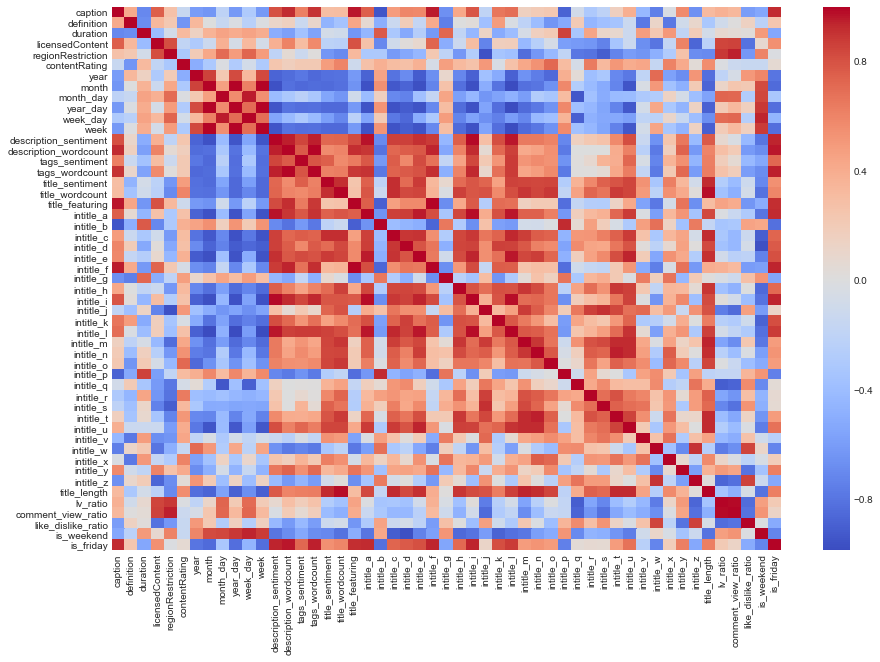

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_eng_vals.groupby('view_class').mean().corr(), cmap='coolwarm')

## <a class="anchor" id="2.2-bullet">2.2 Feature Behavior</a>

In [87]:
def slice_plotter(colname, target, slices=40, height=8, width=8, data=df_eng):
    
    this_df = data
    this_df['this_slice'] = pd.qcut(this_df[colname],slices)
    slice_lowers = [element for element in this_df.groupby('this_slice').mean().index.astype(str).map(lambda x: x[1:x.find(', ')])]

    fig, ax=plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    sns.pointplot(slice_lowers, this_df.groupby('this_slice').mean()[target]);
    ax.set_xticklabels(labels=slice_lowers, rotation=90,  rotation_mode="anchor");
    
    global df_latest_slice
    df_latest_slice = this_df.groupby('this_slice').mean()

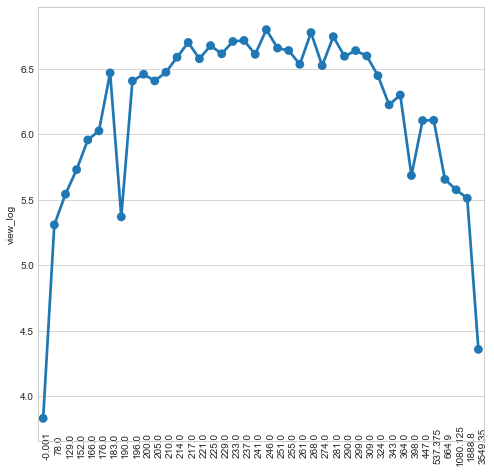

In [88]:
slice_plotter('duration', 'view_log')

In [27]:
df_dur_slice = df_latest_slice

In [28]:
10**df_dur_slice['view_log'].max()

6295753.853425846

In [30]:
df_eng[(df_eng.duration<100)&(df_eng.view_log>7)]['vidId']

543     y7e-GC6oGhg
573     NuIAYHVeFYs
4460    ErMWX--UJZ4
5201    YHRxv-40WMU
5327    q2gICJFG6uw
7412    zXBAGCPvrqc
Name: vidId, dtype: object

In [151]:
df_eng[df_eng.duration==0].view_log.mean()

5.564470908571755

In [152]:
df_eng.view_log.mean()

6.1887429678927495

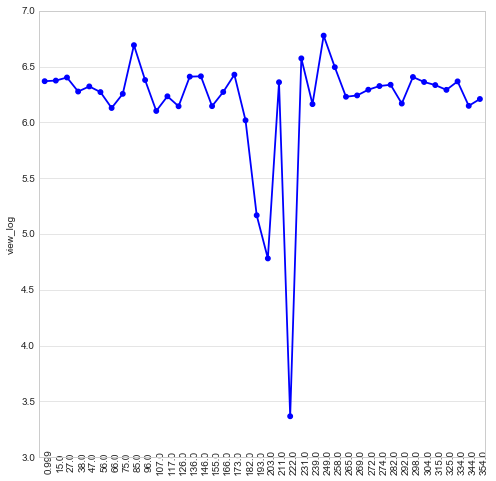

In [4]:
slice_plotter('year_day')

In [98]:
df_eng[(df_eng.year_day>170)&(df_eng.year_day<240)].loc[:, ['title', 'description', 'viewCount', 'licensedContent']].head(15)

,title,description,viewCount,licensedContent
3,Timmy Trumpet - Freaks ('Spinnin Launchpad Cover),Hey guys! Today I played Freaks by Timmy Trump...,22340770,0
4,[CHOREOGRAPHY] BTS (방탄소년단) 정국이랑 지민이 ('Own it' ...,BTS Official Homepage http://bts.ibighit.com\r...,8401703,1
5,SUPER JUNIOR-D&E 슈퍼주니어-D&E '머리부터 발끝까지 ('Bout y...,"SUPER JUNIOR-D&E's The 2nd Mini Album ""Bout Yo...",6271412,1
7,(여자)아이들((G)I-DLE) - '한(一)(HANN(Alone))' (Chore...,[Digital Single] (여자)아이들 - 한(一)(HANN((Alone)\r...,8380081,1
12,打上花火 -Arrange ver.-cover【まふまふ】,映画『打ち上げ花火、下から見るか？横から見るか？』主題歌 DAOKO×米津玄師 covere...,6183440,1
21,[MV] (G)I-DLE((여자)아이들) _ HANN (Alone)(한(一)),[MV] (G)I-DLE((여자)아이들) _ HANN (Alone)(한(一))\r\...,19280457,1
23,Shape Of You - Ed Sheeran ('70s Stevie Wonder ...,Postmodern Jukebox Stevie Wonder funk style co...,1146337,0
25,(G)I-DLE (여자아이들) - HANN (한(一)) (Alone) LYRICS ...,All Rights Administered by CUBE Entertainment\...,5835412,0
29,"""Letting Go"" Live at Bethel Church | Steffany ...","""I confess, I still get scared sometimes. But ...",2590898,1
48,Bee Gees - You Should Be Dancing - Saturday Ni...,John Travolta - Saturday Night Fever,10200039,0


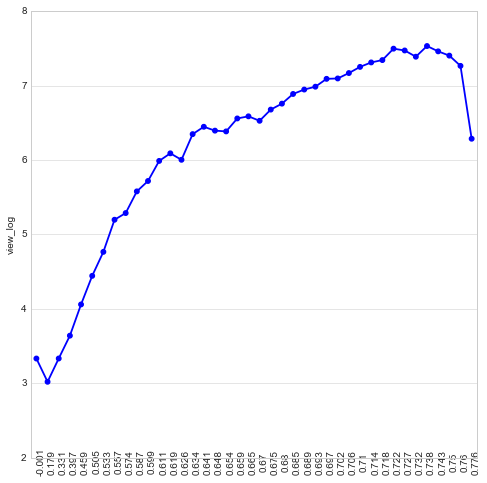

In [6]:
slice_plotter('lv_ratio')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


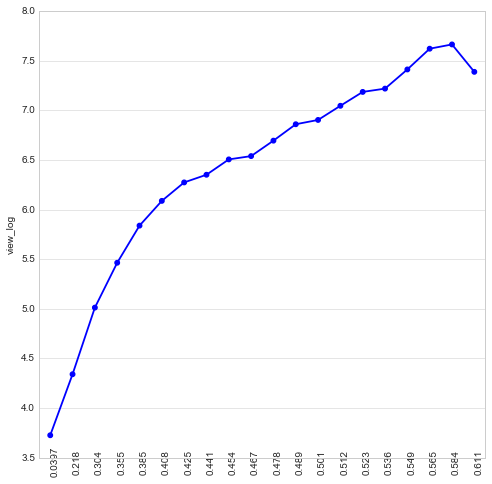

In [19]:
slice_plotter('comment_view_ratio', slices=20, data=df_eng[df_eng['comment_view_ratio']>.01])

In [32]:
df_eng.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'in

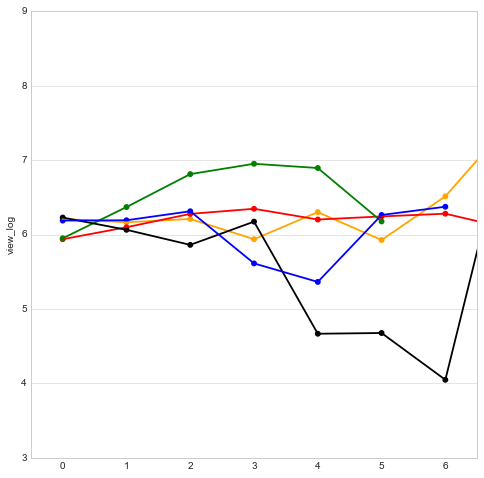

In [70]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
sns.pointplot(x=[x for x in list(df_eng.groupby('intitle_h').mean()['view_log'].index)], y=df_eng.groupby('intitle_h').mean()['view_log'], color='orange');
sns.pointplot(x=[x for x in list(df_eng.groupby('intitle_a').mean()['view_log'].index)], y=df_eng.groupby('intitle_a').mean()['view_log'], color='red');
sns.pointplot(x=[x for x in list(df_eng.groupby('intitle_f').mean()['view_log'].index)], y=df_eng.groupby('intitle_f').mean()['view_log'], color='green');
sns.pointplot(x=[x for x in list(df_eng.groupby('intitle_b').mean()['view_log'].index)], y=df_eng.groupby('intitle_b').mean()['view_log'], color='black');
sns.pointplot(x=[x for x in list(df_eng.groupby('intitle_x').mean()['view_log'].index)], y=df_eng.groupby('intitle_x').mean()['view_log']);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


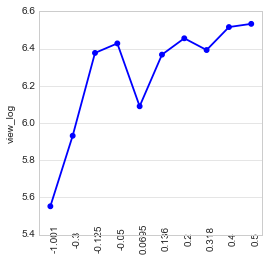

In [79]:
slice_plotter('title_sentiment', height=4, width=4, slices=10, data=df_eng[df_eng.title_sentiment!=0]);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


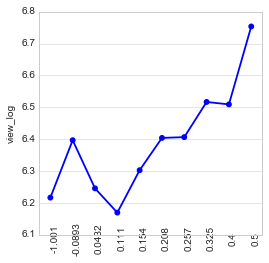

In [77]:
slice_plotter('description_sentiment', height=4, width=4, slices=10, data=df_eng[df_eng.description_sentiment!=0])

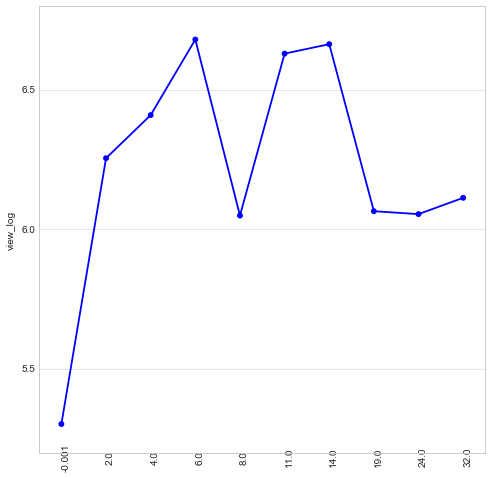

In [83]:
slice_plotter('tags_wordcount', slices=10)

## <a class="anchor" id="2.3-bullet">2.3 Additional Ratio Analysis</a>

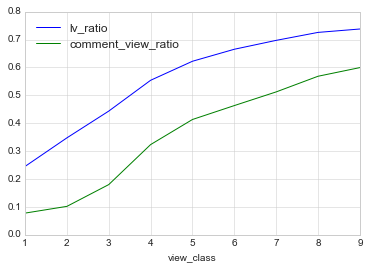

In [7]:
df_eng[df_eng.view_class>0].groupby('view_class').mean().loc[:, ['lv_ratio','comment_view_ratio']].plot()

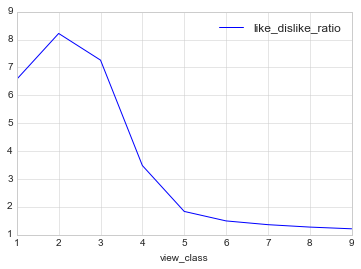

In [8]:
df_eng[df_eng.view_class>0].groupby('view_class').mean().loc[:, ['like_dislike_ratio']].plot()

In [10]:
df_eng['abs_lv_ratio'] = df_eng.likeCount / df_eng.viewCount
df_eng['abs_comment_view_ratio'] = df_eng.commentCount / df_eng.viewCount
df_eng['abs_dislike_view_ratio'] = df_eng.dislikeCount / df_eng.viewCount
df_eng['abs_like_dislike_ratio'] = df_eng.likeCount / df_eng.dislikeCount

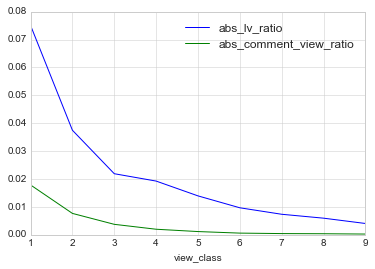

In [12]:
df_eng[df_eng.view_class>0].groupby(by='view_class').mean().loc[:, ['abs_lv_ratio', 'abs_comment_view_ratio']].plot()

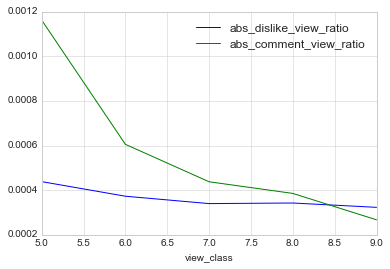

In [13]:
df_eng[df_eng.view_class>4].groupby(by='view_class').mean().loc[:, ['abs_dislike_view_ratio', 'abs_comment_view_ratio']].plot()

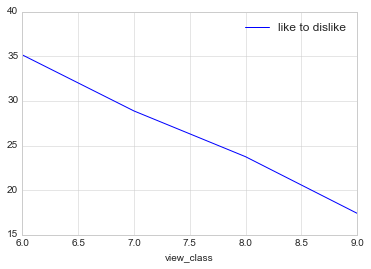

In [14]:
df_eng[df_eng.view_class>0].groupby(by='view_class').mean().loc[:,  'abs_like_dislike_ratio'].plot(label='like to dislike')
plt.legend()

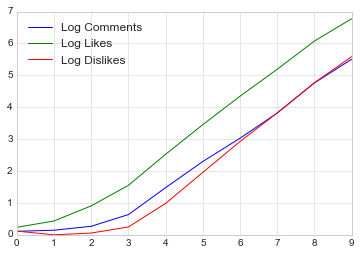

In [15]:
fig, ax = plt.subplots()
ax.plot(df_eng.groupby(by='view_class').mean().loc[:, 'comment_log'], label='Log Comments')
ax.plot(df_eng.groupby(by='view_class').mean().loc[:, 'like_log'], label='Log Likes')
ax.plot(df_eng.groupby(by='view_class').mean().loc[:, 'dislike_log'], label='Log Dislikes')
legend= ax.legend(loc='upper left')